Будем решать задачу регрессии - предсказывать стоимость домов в Калифорнии.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

Загрузим данные.

In [ ]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Обучим модель линейной регрессии на исходных данных.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [ ]:
model = LinearRegression()

model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytest, pred) ** 0.5

0.7214901656777583

Добавим полиномиальные признаки второй степени:

$$1, x_1, x_2 \to 1, x_1, x_2, x_1^2, x_2^2, x_1x_2.$$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)

pf.fit(Xtrain)

Xtrain_new = pf.transform(Xtrain)
Xtest_new = pf.transform(Xtest)

In [ ]:
Xtrain_new[:1].shape

(1, 45)

Обучим на обогащенных признаках модель.

In [ ]:
model.fit(Xtrain_new, ytrain)

pred2 = model.predict(Xtest_new)

In [ ]:
mean_squared_error(ytest, pred2) ** 0.5

0.690413531780605

In [ ]:
Xtrain_new.shape

Ошибка уменьшилась!

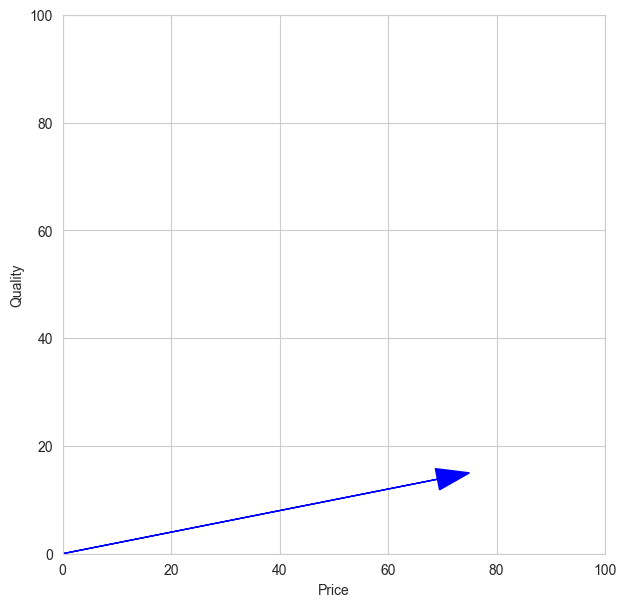

In [2]:
import numpy as np
import matplotlib.pyplot as plt

vector = np.array([75, 15])
plt.figure(figsize=(7, 7))
plt.axis([0, 100, 0, 100])
plt.arrow(0, 0, vector[0], vector[1],
    head_width=4,
    length_includes_head='True',
    color='b')
plt.xlabel('Price')
plt.ylabel('Quality')
plt.grid(True)
plt.show();

In [5]:
import numpy as np
import pandas as pd

reviews_values = [
    [68,18], [81,19], [81,22], [15,75], [75,15], [17,72],
    [24,75], [21,91], [76, 6], [12,74], [18,83], [20,62],
    [21,82], [21,79], [84,15], [73,16], [88,25], [78,23],
    [32, 81], [77, 35]]

reviews = pd.DataFrame(reviews_values, columns=['Price', 'Quality'])

clients_1 = []
clients_2 = []

for client in list(reviews.values):
    if (client[0] > 60 and client[1] < 40):
        clients_1.append(client)
    elif (client[0] < 40 and client[1] > 60):
        clients_2.append(client)

print("Clients from the first aggregator:", clients_1)
print("Clients from the second aggregator:", clients_2)


Clients from the first aggregator: [array([68, 18], dtype=int64), array([81, 19], dtype=int64), array([81, 22], dtype=int64), array([75, 15], dtype=int64), array([76,  6], dtype=int64), array([84, 15], dtype=int64), array([73, 16], dtype=int64), array([88, 25], dtype=int64), array([78, 23], dtype=int64), array([77, 35], dtype=int64)]
Clients from the second aggregator: [array([15, 75], dtype=int64), array([17, 72], dtype=int64), array([24, 75], dtype=int64), array([21, 91], dtype=int64), array([12, 74], dtype=int64), array([18, 83], dtype=int64), array([20, 62], dtype=int64), array([21, 82], dtype=int64), array([21, 79], dtype=int64), array([32, 81], dtype=int64)]


In [7]:
import numpy as np
import pandas as pd

# Create two lists of stock quantities for two different stores
quantity_1 = [25, 63, 80, 91, 81, 55, 14, 76, 33, 71]
quantity_2 = [82, 24, 92, 48, 32, 45, 4, 34, 12, 1]

# Create a list of phone case models
models = ['Silicone case for iPhone 8',
          'Leather case for iPhone 8',
          'Silicone case for iPhone XS',
          'Leather case for iPhone XS',
          'Silicone case for iPhone XS Max',
          'Leather case for iPhone XS Max',
          'Silicone case for iPhone 11',
          'Leather case for iPhone 11',
          'Silicone case for iPhone 11 Pro',
          'Leather case for iPhone 11 Pro']

# Create two DataFrames to hold the stock information for each store
stocks_1 = pd.DataFrame({'Quantity': quantity_1}, index=models)
stocks_2 = pd.DataFrame({'Quantity': quantity_2}, index=models)

# Calculate the total stock quantity for all stores
vector_of_quantity_1 = stocks_1['Quantity'].values
vector_of_quantity_2 = stocks_2['Quantity'].values
vector_of_quantity_united = vector_of_quantity_1 + vector_of_quantity_2

# Create a new DataFrame with the total stock quantity for all stores
stocks_united = pd.DataFrame({'Quantity': vector_of_quantity_united}, index=models)

# Print the table of phone case models and their stock quantities for all stores
print(stocks_united)


                                 Quantity
Silicone case for iPhone 8            107
Leather case for iPhone 8              87
Silicone case for iPhone XS           172
Leather case for iPhone XS            139
Silicone case for iPhone XS Max       113
Leather case for iPhone XS Max        100
Silicone case for iPhone 11            18
Leather case for iPhone 11            110
Silicone case for iPhone 11 Pro        45
Leather case for iPhone 11 Pro         72


In [10]:
import numpy as np
import pandas as pd

quantity_1 = [25, 63, 80, 91, 81, 55, 14, 76, 33, 71]
models = ['Silicone case for iPhone 8',
          'Leather case for iPhone 8',
          'Silicone case for iPhone XS',
          'Leather case for iPhone XS',
          'Silicone case for iPhone XS Max',
          'Leather case for iPhone XS Max',
          'Silicone case for iPhone 11',
          'Leather case for iPhone 11',
          'Silicone case for iPhone 11 Pro',
          'Leather case for iPhone 11 Pro',
         ]
stocks_1 = pd.DataFrame({'Quantity' : quantity_1}, index=models)
quantity_2 = [82, 24, 92, 48, 32, 45, 4, 34, 12, 1]
stocks_2 = pd.DataFrame({'Quantity' : quantity_2}, index=models)

vector_of_quantity_1 = stocks_1['Quantity'].values
vector_of_quantity_2 = stocks_2['Quantity'].values
vector_of_quantity_united = vector_of_quantity_1 + vector_of_quantity_2

stocks_united = pd.DataFrame({'Quantity' : vector_of_quantity_united}, index=models)
stocks_united['Price'] = [3000, 2100, 3200, 2200, 1800, 1700, 3800, 1200, 2300, 2900]

price_united = stocks_united['Price'].values
price_discount_10 = price_united * 0.9
stocks_united['Price with 10% discount'] = price_discount_10.astype(int)

price_no_discount = 1.1 * price_discount_10
stocks_united['Price increased by 10%'] = price_no_discount.astype(int)
print(stocks_united);

                                 Quantity  Price  Price with 10% discount  \
Silicone case for iPhone 8            107   3000                     2700   
Leather case for iPhone 8              87   2100                     1890   
Silicone case for iPhone XS           172   3200                     2880   
Leather case for iPhone XS            139   2200                     1980   
Silicone case for iPhone XS Max       113   1800                     1620   
Leather case for iPhone XS Max        100   1700                     1530   
Silicone case for iPhone 11            18   3800                     3420   
Leather case for iPhone 11            110   1200                     1080   
Silicone case for iPhone 11 Pro        45   2300                     2070   
Leather case for iPhone 11 Pro         72   2900                     2610   

                                 Price increased by 10%  
Silicone case for iPhone 8                         2970  
Leather case for iPhone 8           

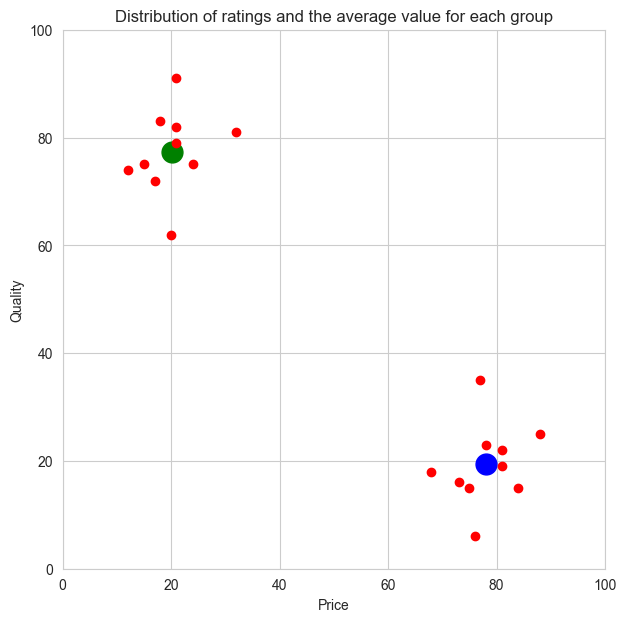

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

reviews_values = [
    [68,18], [81,19], [81,22], [15,75], [75,15], [17,72],
    [24,75], [21,91], [76, 6], [12,74], [18,83], [20,62],
    [21,82], [21,79], [84,15], [73,16], [88,25], [78,23],
    [32, 81], [77, 35]]
reviews = pd.DataFrame(reviews_values, columns=['Цена', 'Качество'])
price = reviews['Цена'].values
quality = reviews['Качество'].values

clients_1 = []
clients_2 = []
for client in list(reviews.values):
    if client[0] < 40 and client[1] > 60:
        clients_2.append(client)
    else:
        clients_1.append(client)

average_client_1 = sum(clients_1)/len(clients_1)

average_client_2 = sum(clients_2)/len(clients_2)

plt.figure(figsize=(7, 7))
plt.axis([0, 100, 0, 100])

# Plot the average for group 1
plt.plot(average_client_1[0], average_client_1[1],
         'bo', markersize=15)

# Plot the average for group 2
plt.plot(average_client_2[0], average_client_2[1],
         'go', markersize=15)
plt.plot(price, quality, 'ro')
plt.xlabel('Price')
plt.ylabel('Quality')
plt.grid(True)
plt.title("Distribution of ratings and the average value for each group")
plt.show();


In [14]:
import numpy as np

array1 = np.array([2, -4, 6, -8])
array2 = np.array([1, 2, 3, 4])
array_mult = array1 * array2
array_div = array1 / array2

print("Product of two arrays: ", array_mult)
print("Quotient of two arrays: ", array_div)

# Product of two arrays: [ 2 -8 18 -32]
# Quotient of two arrays: [ 2. -2. 2. -2.]

Product of two arrays:  [  2  -8  18 -32]
Quotient of two arrays:  [ 2. -2.  2. -2.]


In [15]:
import numpy as np

def logistic_transform(values):
    return 1 / (1+ np.exp(-values))

our_values = np.array([-20, 0, 0.5, 80, -1])
print(logistic_transform(our_values))

[2.06115362e-09 5.00000000e-01 6.22459331e-01 1.00000000e+00
 2.68941421e-01]


In [16]:
import numpy as np

target = np.array([0.9, 1.2, 1.4, 1.5, 1.9, 2.0])
predictions = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])

Here are the translations for the answer options:

* $sin(x_3)$
* $x_1 \cdot x_3$
* ${x_2^3}$

The question asks which features make sense to add to numerical features $x_1$, $x_2$, and $x_3$ in a regression problem to help a linear model better solve the task.





$1/x$

$x_1, x_2, x_3, ..., x_{100}$